In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from doodle_parsing_utils import *
import re
import clip
import torch
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
from typing import List, Tuple

In [3]:
example_data = np.load("./dataset/sketchrnn_apple.full.npz", encoding='latin1', allow_pickle=True)

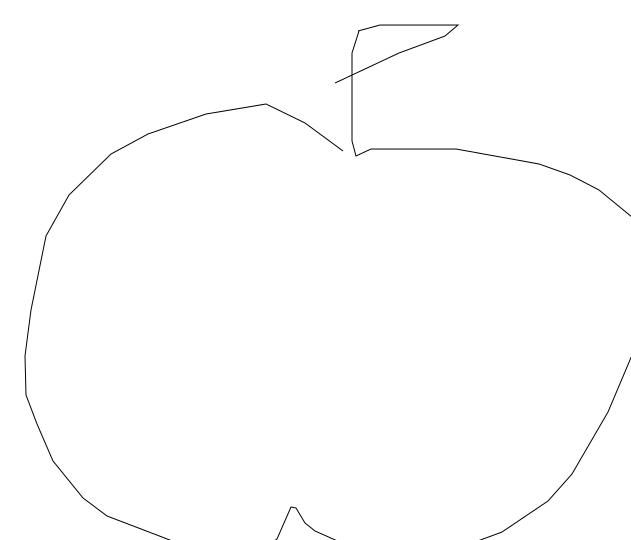

In [4]:
import random
draw_strokes(random.choice(example_data['train']), factor=1)

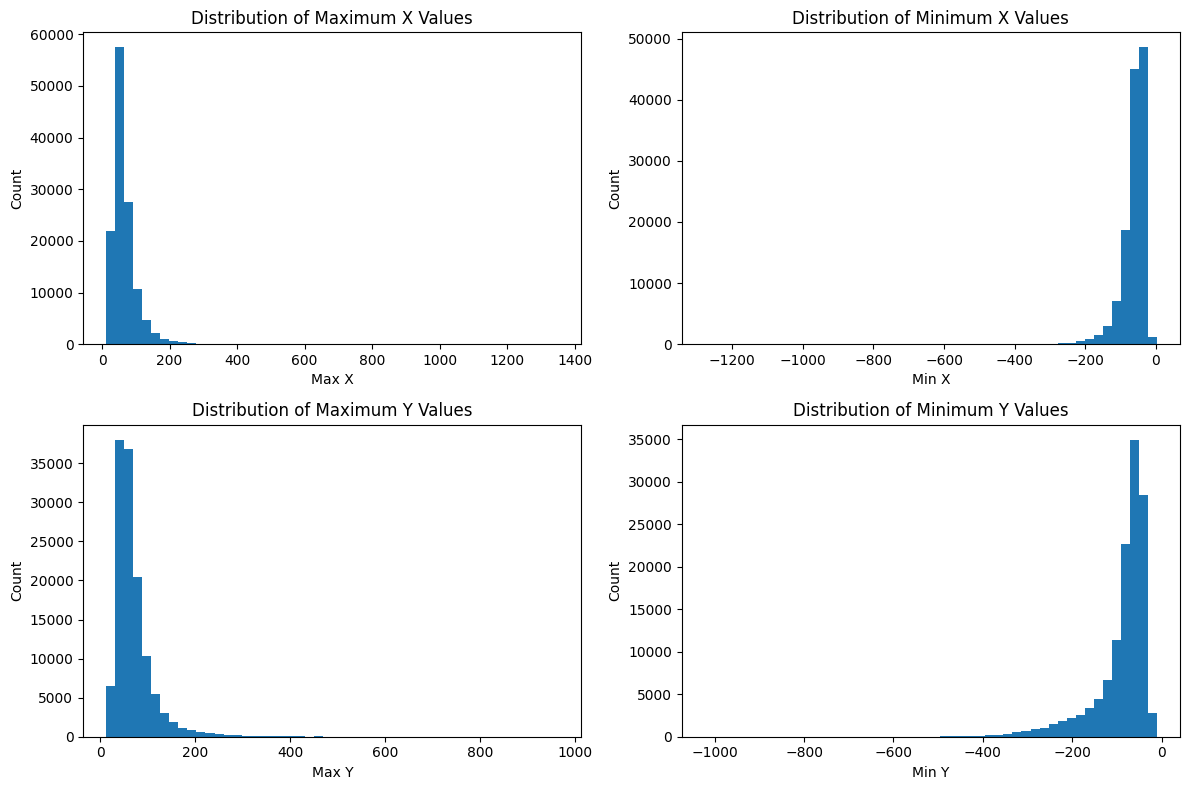

In [20]:
x_maxs = [max(i[:, 0]) for i in example_data['train']]
x_mins = [min(i[:, 0]) for i in example_data['train']]

y_maxs = [max(i[:, 1]) for i in example_data['train']]
y_mins = [min(i[:, 1]) for i in example_data['train']]

plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
plt.hist(x_maxs, bins=50)
plt.title('Distribution of Maximum X Values')
plt.xlabel('Max X')
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.hist(x_mins, bins=50)
plt.title('Distribution of Minimum X Values')
plt.xlabel('Min X')
plt.ylabel('Count')

plt.subplot(2,2,3)
plt.hist(y_maxs, bins=50)
plt.title('Distribution of Maximum Y Values')
plt.xlabel('Max Y')
plt.ylabel('Count')

plt.subplot(2,2,4)
plt.hist(y_mins, bins=50)
plt.title('Distribution of Minimum Y Values')
plt.xlabel('Min Y')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Drawing with maximum x value:


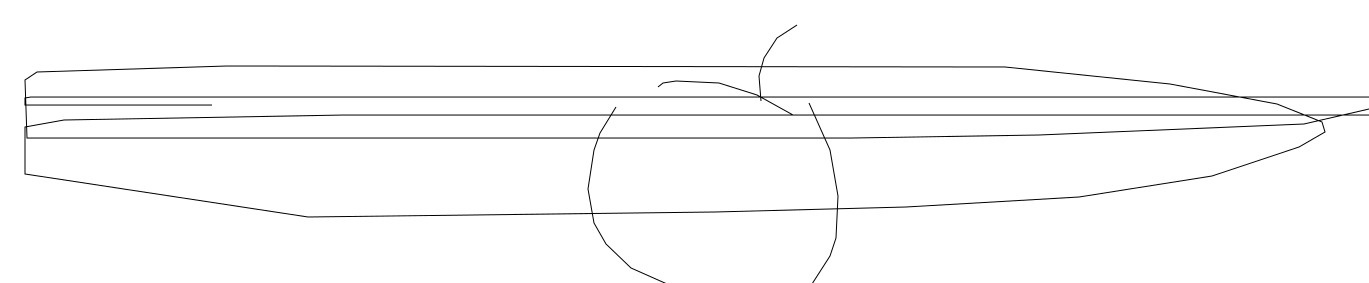


Drawing with minimum x value:


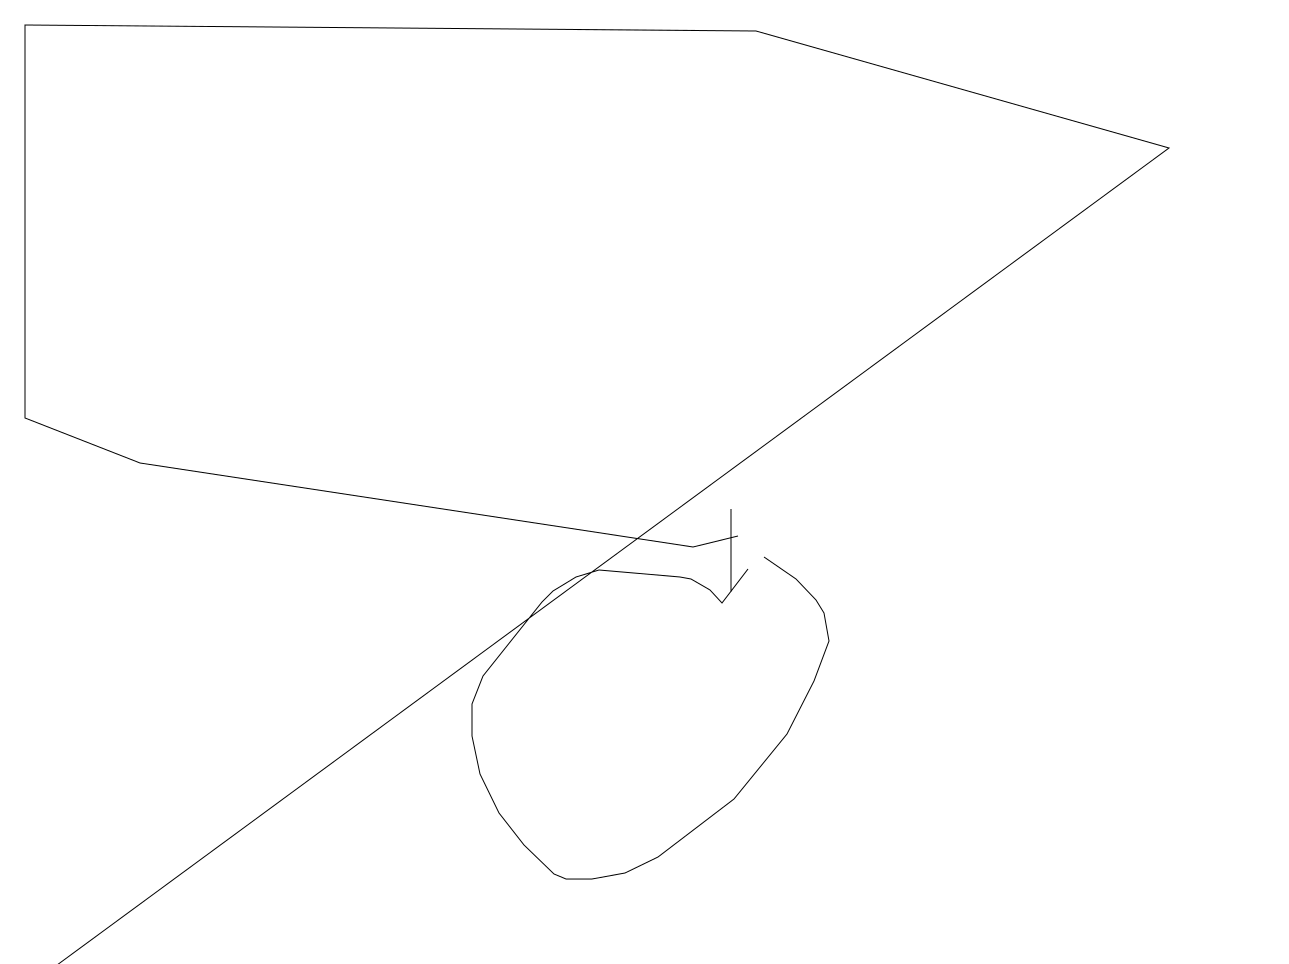


Drawing with maximum y value:


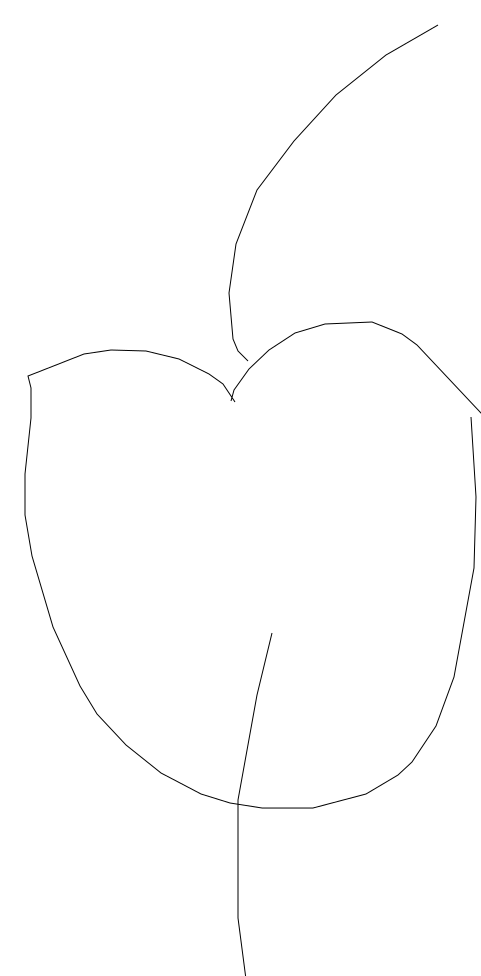


Drawing with minimum y value:


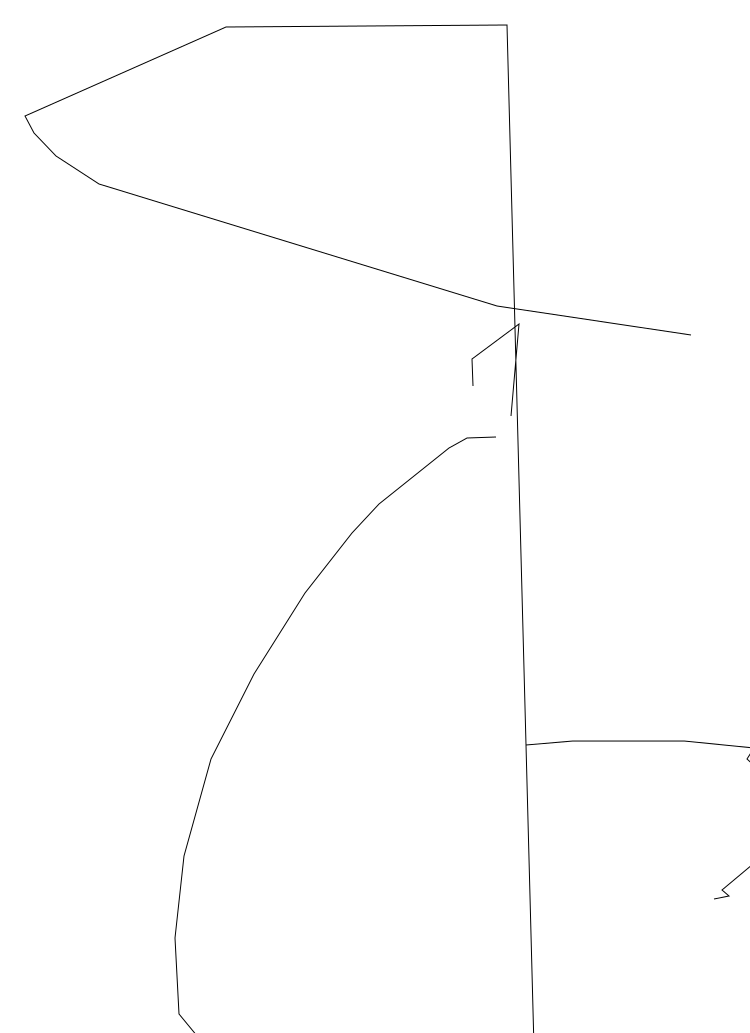

In [21]:
print("Drawing with maximum x value:")
draw_strokes(example_data['train'][x_maxs.index(max(x_maxs))], factor=1)

print("\nDrawing with minimum x value:")
draw_strokes(example_data['train'][x_mins.index(min(x_mins))], factor=1)

print("\nDrawing with maximum y value:")
draw_strokes(example_data['train'][y_maxs.index(max(y_maxs))], factor=1)

print("\nDrawing with minimum y value:")
draw_strokes(example_data['train'][y_mins.index(min(y_mins))], factor=1)


In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'